# DMS SVM

I use DMS experiments as a training set and try to predict the effect of mutations in a LOPO fashion.

## Load the training data

I use the save csv data from `dms_dataset_creation`.

In [1]:
import pandas as pd

df = pd.read_csv('/home/saul/master_thesis_work/dataset/dms/dms_training.csv')
df

/home/saul/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,protein,dms_id,uniprot_id,position,aa1,aa2,reported_fitness,pdb_id,pdb_chain,author_year,...,hmm_pssm_aa1_likelyhood,hmm_pssm_aa2_likelyhood,hmm_pssm_delta_likelyhood,tr_rosetta_feature_index,tr_rosetta_graph_closeness_centrality,tr_rosetta_graph_betweenness_centrality,tr_rosetta_graph_degree_centrality,tr_rosetta_graph_load_centrality,tr_rosetta_graph_harmonic_centrality,tr_rosetta_graph_clustering
0,TEM-1,beta-lactamase,P62593,20,P,P,0.581033,1btl,A,Firnberg2014,...,2.81126,2.81126,0.00000,19,0.150237,0.008805,0.021053,0.014844,0.53203,0.666667
1,TEM-1,beta-lactamase,P62593,20,P,Q,0.441480,1btl,A,Firnberg2014,...,2.81126,3.27353,0.46227,19,0.150237,0.008805,0.021053,0.014844,0.53203,0.666667
2,TEM-1,beta-lactamase,P62593,20,P,D,0.289750,1btl,A,Firnberg2014,...,2.81126,2.92236,0.11110,19,0.150237,0.008805,0.021053,0.014844,0.53203,0.666667
3,TEM-1,beta-lactamase,P62593,20,P,K,0.196582,1btl,A,Firnberg2014,...,2.81126,2.72602,-0.08524,19,0.150237,0.008805,0.021053,0.014844,0.53203,0.666667
4,TEM-1,beta-lactamase,P62593,20,P,N,0.053725,1btl,A,Firnberg2014,...,2.81126,3.00679,0.19553,19,0.150237,0.008805,0.021053,0.014844,0.53203,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21837,Yap65,WW_domain,P46937,203,R,C,-2.667780,4rex,A,Fowler2010,...,0.59945,5.62776,5.02831,36,0.336134,0.011106,0.150000,0.010839,0.17050,0.800000
21838,Yap65,WW_domain,P46937,203,R,G,-2.731940,4rex,A,Fowler2010,...,0.59945,3.26877,2.66932,36,0.336134,0.011106,0.150000,0.010839,0.17050,0.800000
21839,Yap65,WW_domain,P46937,203,R,D,-2.850370,4rex,A,Fowler2010,...,0.59945,3.95240,3.35295,36,0.336134,0.011106,0.150000,0.010839,0.17050,0.800000
21840,Yap65,WW_domain,P46937,203,R,H,-3.011270,4rex,A,Fowler2010,...,0.59945,4.16162,3.56217,36,0.336134,0.011106,0.150000,0.010839,0.17050,0.800000


## Selecting the features to use

In [2]:
features = [
    'aa1',
    'aa2',
    #'ev_frequency',
    #'ev_conservation',
    'ev_independent',
    'ev_epistatic',
    'netsurf_rsa',
    #'netsurf_asa',
    #'netsurf_p_q3_H','netsurf_p_q3_E','netsurf_p_q3_C',
    #'netsurf_p_q8_G','netsurf_p_q8_H','netsurf_p_q8_I','netsurf_p_q8_B',
    #'netsurf_p_q8_E','netsurf_p_q8_S','netsurf_p_q8_T','netsurf_p_q8_C',
    #'netsurf_phi',
    #'netsurf_psi',
    'netsurf_disorder',
    #'hmm_pssm_A', 'hmm_pssm_C', 'hmm_pssm_D', 'hmm_pssm_E', 'hmm_pssm_F',
    #'hmm_pssm_G', 'hmm_pssm_H', 'hmm_pssm_I', 'hmm_pssm_K', 'hmm_pssm_L',
    #'hmm_pssm_M', 'hmm_pssm_N', 'hmm_pssm_P', 'hmm_pssm_Q', 'hmm_pssm_R',
    #'hmm_pssm_S', 'hmm_pssm_T', 'hmm_pssm_V', 'hmm_pssm_W', 'hmm_pssm_Y',
    #'hmm_pssm_aa1_likelyhood',
    'hmm_pssm_aa2_likelyhood',
    'hmm_pssm_delta_likelyhood',
    'tr_rosetta_graph_closeness_centrality',
    #'tr_rosetta_graph_betweenness_centrality',
    #'tr_rosetta_graph_degree_centrality',
    #'tr_rosetta_graph_load_centrality',
    #'tr_rosetta_graph_harmonic_centrality',
    #'tr_rosetta_graph_clustering',
]
# get dummies is an amazing function that automagically converts to 1-hot what is needed
x = pd.get_dummies(df[features])
x

,ev_independent,ev_epistatic,netsurf_rsa,netsurf_disorder,hmm_pssm_aa2_likelyhood,hmm_pssm_delta_likelyhood,tr_rosetta_graph_closeness_centrality,aa1_A,aa1_C,aa1_D,...,aa2_M,aa2_N,aa2_P,aa2_Q,aa2_R,aa2_S,aa2_T,aa2_V,aa2_W,aa2_Y
0,NaN,NaN,0.693609,0.992635,2.81126,0.00000,0.150237,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.849266,-5.159727,0.693609,0.992635,3.27353,0.46227,0.150237,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.544804,-6.004645,0.693609,0.992635,2.92236,0.11110,0.150237,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.504949,-5.030978,0.693609,0.992635,2.72602,-0.08524,0.150237,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.681884,-5.148633,0.693609,0.992635,3.00679,0.19553,0.150237,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21837,-8.631075,-8.171522,0.398042,0.267757,5.62776,5.02831,0.336134,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21838,-8.631075,-8.171522,0.398042,0.267757,3.26877,2.66932,0.336134,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21839,-8.631075,-8.171522,0.398042,0.267757,3.95240,3.35295,0.336134,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21840,-5.007457,-5.185575,0.398042,0.267757,4.16162,3.56217,0.336134,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Create the model

I declare some functions that define the model and the plotting routines for the results and for feature importances.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, RobustScaler, StandardScaler, Normalizer
from sklearn.decomposition import PCA, FastICA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import joblib

def preprocess_features(x, train_bool):
    imp = SimpleImputer()
    imp.fit(x[train_bool])
    x_imp= imp.transform(x)
    return x_imp

def get_model():
    model = SVR(kernel='rbf', gamma=0.1, epsilon=0.1, C=0.01)
    return model

def lopo_plots_and_correlation(x_df, df, target):
    lopo = LeaveOneGroupOut()
    x = x_df.to_numpy()
    y = np.array(df[target])
    is_wt = np.array(df.aa1 == df.aa2)
    for train, val in lopo.split(x, groups=df.protein):
        curr_protein_tested = set(df.protein.iloc[val])
        model = get_model()
        x_curr = preprocess_features(x, train)
        model.fit(x_curr[train], y[train])
        y_pred = model.predict(x_curr).flatten()
        train_spearman_list = []
        for dataset in list(set(df.dms_id.iloc[train])):
            bool_to_consider = np.array(df.dms_id == dataset)
            train_spearman_list.append(stats.spearmanr(y_pred[bool_to_consider], y[bool_to_consider])[0])
        train_spearman = np.average(train_spearman_list)
        for dataset in list(set(df.dms_id.iloc[val])):
            bool_to_consider = np.array(df.dms_id == dataset)
            print('Dataset:', dataset)
            print('Protein:', curr_protein_tested)
            print('Uniprot ID:', set(df.uniprot_id.iloc[bool_to_consider]))
            print('Basename:', set(df.feature_basename.iloc[bool_to_consider]))
            val_spearman = stats.spearmanr(y_pred[bool_to_consider], y[bool_to_consider])[0]
            print('val spearman:', val_spearman, 'train spearman:', train_spearman)
            plt.close()
            sns.scatterplot(x=y[bool_to_consider & ~is_wt],
                            y=y_pred[bool_to_consider & ~is_wt],
                            marker='x')
            sns.scatterplot(x=y[bool_to_consider & is_wt],
                            y=y_pred[bool_to_consider & is_wt],
                            s=100,
                            alpha=0.5)
            plt.show()

Dataset: kka2_1:2
Protein: {'Kka2'}
Uniprot ID: {'P00552'}
Basename: {'P00552'}
val spearman: 0.6320188467741543 train spearman: 0.5933292697548536


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


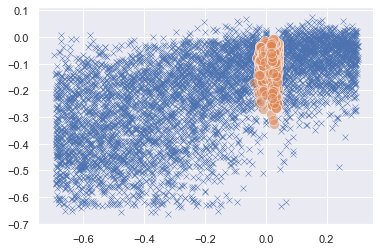

Dataset: PSD95pdz3
Protein: {'PSD95pdz3'}
Uniprot ID: {'P31016'}
Basename: {'P31016'}
val spearman: 0.5875349932199607 train spearman: 0.5994306994386918


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


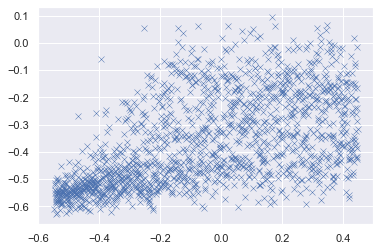

Dataset: Pab1
Protein: {'Pab1'}
Uniprot ID: {'P04147'}
Basename: {'P04147'}
val spearman: 0.6747069688446463 train spearman: 0.5807855933768195


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


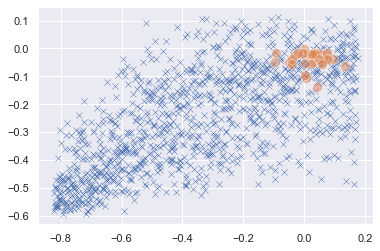

Dataset: beta-lactamase
Protein: {'TEM-1'}
Uniprot ID: {'P62593'}
Basename: {'P62593'}
val spearman: 0.7255431004113214 train spearman: 0.582749481246639


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


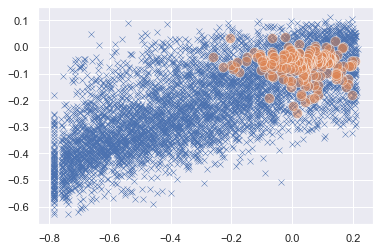

Dataset: E1_Ubiquitin
Protein: {'UBI4'}
Uniprot ID: {'P0CG63'}
Basename: {'P0CG63_1-76'}
val spearman: 0.4750317202259294 train spearman: 0.6188809988646605


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


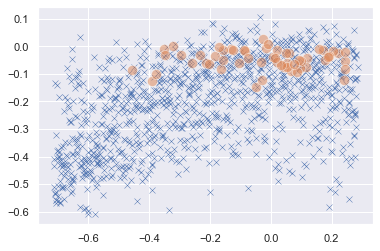

Dataset: Ubiquitin
Protein: {'UBI4'}
Uniprot ID: {'P0CG63'}
Basename: {'P0CG63_1-76'}
val spearman: 0.46383822759950233 train spearman: 0.6188809988646605


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


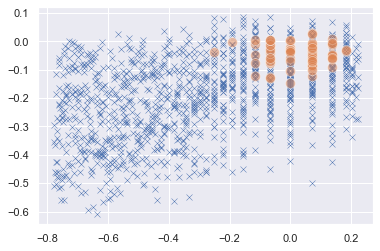

Dataset: WW_domain
Protein: {'Yap65'}
Uniprot ID: {'P46937'}
Basename: {'P46937'}
val spearman: 0.5663627900351526 train spearman: 0.5952823030083371


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


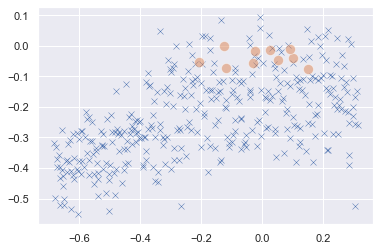

Dataset: gb1
Protein: {'gb1'}
Uniprot ID: {'P06654'}
Basename: {'P06654'}
val spearman: 0.46301637046127936 train spearman: 0.6032685943293826


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


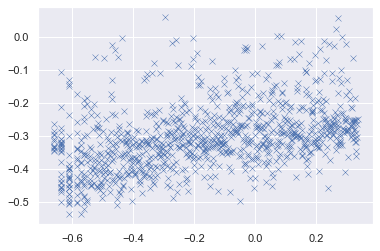

Dataset: hsp90
Protein: {'hsp90'}
Uniprot ID: {'P02829'}
Basename: {'P02829_2-231'}
val spearman: 0.4335795079888764 train spearman: 0.6096045140146489


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


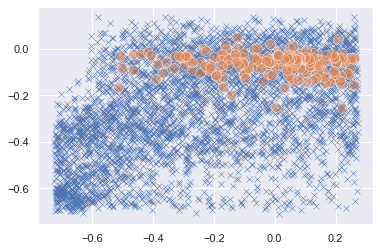

In [4]:
lopo_plots_and_correlation(x, df, 'reported_fitness_quantile')